# Iniciando e baixando dataset do Keras

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

    100% |████████████████████████████████| 92.6MB 521kB/s ta 0:00:01
    100% |████████████████████████████████| 1.2MB 2.4MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 2.6MB/s a 0:00:011
    100% |████████████████████████████████| 10.8MB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 3.2MB/s ta 0:00:01
    100% |████████████████████████████████| 368kB 2.7MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 2.0MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 3.2MB/s ta 0:00:011
    100% |████████████████████████████████| 112kB 2.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/josebentivi/.cache/pip/wheels/ee/98/38/46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Running setup.py bdist_wheel for termcolor ... done
  Stored in direc

Separando treino-teste

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Analizando dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

In [6]:
identificacoes_teste.shape

(10000,)

In [7]:
identificacoes_treino.min()

0

In [8]:
identificacoes_treino.max()

9

Visualizando dados

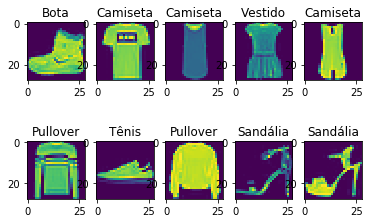

In [9]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

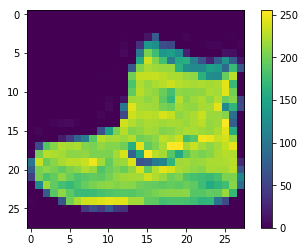

In [10]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Método de categorização

In [11]:
def MetodoKeras(imagens_treino, identificacoes_treino, epochs, proporcao_split_validacao):

    #normalização
    imagens_treino = imagens_treino/float(255) #Normalização

    modelo = keras.Sequential([ 
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        keras.layers.Dropout(0.2), #diminui o vício do treino
        #Camadas extras (testar caso a caso se melhora a eficácia)
        #keras.layers.Dense(128, activation=tensorflow.nn.relu),
        #keras.layers.Dense(64, activation=tensorflow.nn.relu),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ])

    modelo.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

    historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=epochs, validation_split=proporcao_split_validacao)

    return historico,modelo

In [12]:
import time

tic = time.time()
historico,modelo = MetodoKeras(imagens_treino,identificacoes_treino,5,0.2)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 187us/sample - loss: 0.5283 - acc: 0.8123 - val_loss: 0.4203 - val_acc: 0.8473
Epoch 2/5
48000/48000 [==============================] - 8s 177us/sample - loss: 0.3985 - acc: 0.8564 - val_loss: 0.3761 - val_acc: 0.8643
Epoch 3/5
48000/48000 [==============================] - 8s 176us/sample - loss: 0.3617 - acc: 0.8667 - val_loss: 0.3441 - val_acc: 0.8727
Epoch 4/5
48000/48000 [==============================] - 9s 182us/sample - loss: 0.3387 - acc: 0.8745 - val_loss: 0.3515 - val_acc: 0.8705
Epoch 5/5
48000/48000 [==============================] - 9s 179us/sample - loss: 0.3209 - acc: 0.8814 - val_loss: 0.3296 - val_acc: 0.8792
Tempo 44.42 segundos


In [13]:
'''
#salvar um modelo
modelo.save('modelo.h5')

#carregar um modelo
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')
'''

"\n#salvar um modelo\nmodelo.save('modelo.h5')\n\n#carregar um modelo\nfrom tensorflow.keras.models import load_model\nmodelo_salvo = load_model('modelo.h5')\n"

In [16]:
historico.history

{'loss': [0.5283026331762473,
  0.3984866754213969,
  0.3616612046783169,
  0.33871265935649475,
  0.3208722724666198],
 'acc': [0.8122917, 0.85641664, 0.86670834, 0.87452084, 0.881375],
 'val_loss': [0.42030512082576754,
  0.37613387376070023,
  0.3440534273982048,
  0.35150114144881567,
  0.3296219540834427],
 'val_acc': [0.8473333, 0.86425, 0.87275, 0.8705, 0.87916666]}

Observando método

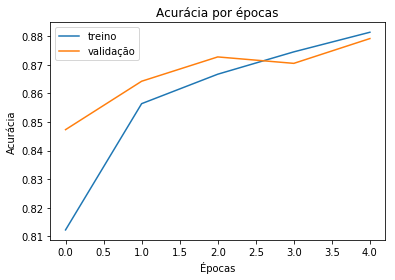

In [17]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])

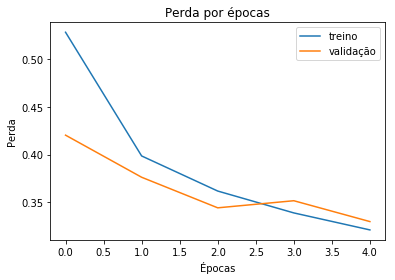

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'])

Predizendo

In [19]:
testes = modelo.predict(imagens_teste)
print('resultado teste:',np.argmax(testes[0]))
print('número da imagem de teste:',identificacoes_teste[0])

resultado teste: 9
número da imagem de teste: 9


In [20]:
testes_modelo = modelo.predict(imagens_teste)
print('resultado teste:',np.argmax(testes_modelo[0]))
print('número da imagem de teste:',identificacoes_teste[0])

resultado teste: 9
número da imagem de teste: 9


Acurácia

In [21]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 43us/sample - loss: 2.2142 - acc: 0.8605
Perda do teste: 2.2142081642746874
Acurácia do teste: 0.8605
